In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('train.csv')
df

,Category,Text
0,Accountant,education omba executive leadership university...
1,Accountant,howard gerrard accountant deyjobcom birmingham...
2,Accountant,kevin frank senior accountant inforesumekraftc...
3,Accountant,place birth nationality olivia ogilvy accounta...
4,Accountant,stephen greet cpa senior accountant 9 year exp...
...,...,...
13384,Web Designing,jessica claire montgomery street san francisco...
13385,Web Designing,jessica claire montgomery street san francisco...
13386,Web Designing,summary jessica claire 100 montgomery st 10th ...
13387,Web Designing,jessica claire montgomery street san francisco...


In [ ]:
# Check the basic information about the dataframe
print("DataFrame Info:")
print(df.info())

# Display first few rows
print("\nFirst 5 rows:")
print(df.head())

# Check class distribution
print("\nCategory Distribution:")
print(df['Category'].value_counts())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13389 entries, 0 to 13388
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  13389 non-null  object
 1   Text      13389 non-null  object
dtypes: object(2)
memory usage: 209.3+ KB
None

First 5 rows:
     Category                                               Text
0  Accountant  education omba executive leadership university...
1  Accountant  howard gerrard accountant deyjobcom birmingham...
2  Accountant  kevin frank senior accountant inforesumekraftc...
3  Accountant  place birth nationality olivia ogilvy accounta...
4  Accountant  stephen greet cpa senior accountant 9 year exp...

Category Distribution:
Category
Education                    410
Electrical Engineering       384
Mechanical Engineer          384
Consultant                   368
Sales                        364
Civil Engineer               364
Management                   361
Human Re

###  Text Preprocessing 

 we import required libraries for text preprocessing and download necessary NLTK resources. We define a `preprocess_text()` function that:

- Converts text to lowercase  
- Removes special characters and punctuations  
- Tokenizes text into words  
- Removes stopwords  
- Applies lemmatization to reduce words to their base form  
- Joins the cleaned words back into a single string


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # remove special characters and punctuations
    words = nltk.word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    text =  ' '.join(words)

    return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['Text'] = df['Text'].apply(preprocess_text)

### Label Encoding Target Variable

`LabelEncoder` from scikit-learn to convert categorical labels in the `'Category'` column into numeric values. 

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Fit and transform the categories
df['label'] = label_encoder.fit_transform(df['Category'])

# Show the mapping
print("\nLabel Encoding Mapping:")
for i, category in enumerate(label_encoder.classes_):
    print(f"{category} → {i}")


Label Encoding Mapping:
Accountant → 0
Advocate → 1
Agriculture → 2
Apparel → 3
Architecture → 4
Arts → 5
Automobile → 6
Aviation → 7
BPO → 8
Banking → 9
Blockchain → 10
Building and Construction → 11
Business Analyst → 12
Civil Engineer → 13
Consultant → 14
Data Science → 15
Database → 16
Designing → 17
DevOps → 18
Digital Media → 19
DotNet Developer → 20
ETL Developer → 21
Education → 22
Electrical Engineering → 23
Finance → 24
Food and Beverages → 25
Health and Fitness → 26
Human Resources → 27
Information Technology → 28
Java Developer → 29
Management → 30
Mechanical Engineer → 31
Network Security Engineer → 32
Operations Manager → 33
PMO → 34
Public Relations → 35
Python Developer → 36
React Developer → 37
SAP Developer → 38
SQL Developer → 39
Sales → 40
Testing → 41
Web Designing → 42


In [ ]:
df.head()

,Category,Text,label
0,Accountant,education omba executive leadership university...,0
1,Accountant,howard gerrard accountant deyjobcom birmingham...,0
2,Accountant,kevin frank senior accountant inforesumekraftc...,0
3,Accountant,place birth nationality olivia ogilvy accounta...,0
4,Accountant,stephen greet cpa senior accountant 9 year exp...,0


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data (80% train, 20% validation)
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# Check the shapes
print(f"\nTraining set shape: {train_df.shape}")
print(f"Validation set shape: {val_df.shape}")

# Verify class distribution in splits
print("\nClass distribution in training set:")
print(train_df['Category'].value_counts(normalize=True))

print("\nClass distribution in validation set:")
print(val_df['Category'].value_counts(normalize=True))


Training set shape: (10711, 3)
Validation set shape: (2678, 3)

Class distribution in training set:
Category
Education                    0.030809
Mechanical Engineer          0.028942
Electrical Engineering       0.028569
Management                   0.028102
Sales                        0.027822
Consultant                   0.027448
Network Security Engineer    0.027168
Digital Media                0.026795
Testing                      0.026702
Civil Engineer               0.026702
Human Resources              0.026702
Building and Construction    0.026608
Operations Manager           0.026515
Aviation                     0.026328
Java Developer               0.025861
Business Analyst             0.025675
Accountant                   0.025301
SQL Developer                0.025208
DotNet Developer             0.025021
Finance                      0.025021
Health and Fitness           0.024648
Arts                         0.024554
Public Relations             0.024461
Architecture    

### Loading and Testing BERT Tokenizer

we load the pre-trained BERT tokenizer (`bert-base-uncased`) from Hugging Face’s `transformers` library.
- View the tokenized output (subword tokens)
- See the corresponding token IDs generated by the tokenizer


In [ ]:
from transformers import BertTokenizer

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Test tokenizer on a sample
sample_text = train_df['Text'].iloc[0]
print(f"\nSample text: {sample_text}")
print(f"Tokenized: {tokenizer.tokenize(sample_text)}")
print(f"Token IDs: {tokenizer.encode(sample_text)}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]


Sample text: david kent pmp email davidkentpmresultsca phone c 4038185771 profile resume senior manager 15 year handson experience spanning program project pmo product team management diverse background technical managerial area experience creating vision strategy portal business management software development ecommerce cm application sem seo web strategy delivering business critical information system project client located north america europe professional experienceaccomplishments altalink manager inois porfolio project aug 2011present project management office pmo worked closely pm team senior leadership develop implement pmo including creation project lifecycle framework governance standard utilized mananged team 20 project manager delivering approx 45m capital portfolio project spanning 13 program including limited safetyfacilities netcom system operation cyber security worked business unit develop inois general tariff application gta submission alberta regulator identified ino

### Custom Dataset Class for Text Classification

This cell defines a custom PyTorch `Dataset` class for text classification tasks. It:

- Stores texts, labels, tokenizer, and maximum token length  
- Implements `__len__()` to return the dataset size  
- Implements `__getitem__()` to:
  - Tokenize each text with padding and truncation  
  - Convert tokenized inputs and labels to PyTorch tensors  
  - Return a dictionary containing `input_ids`, `attention_mask`, and `labels` for each sample

In [ ]:
import torch
from torch.utils.data import Dataset

class TextClassificationDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        # Tokenize the text
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )

        # Convert to PyTorch tensors and remove batch dimension (added by tokenizer)
        item = {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }
        return item

### Creating the training and validation Dataset

we create an object of our custom dataset class by passing the text, labels, tokenizer, and max length.


In [ ]:
# Initialize dataset
train_dataset = TextClassificationDataset(
    texts=train_df['Text'].tolist(),
    labels=train_df['label'].tolist(),
    tokenizer=tokenizer,
    max_length=128
)

# Check one sample
sample = train_dataset[0]
print("Sample keys:", sample.keys())
print("Input IDs shape:", sample['input_ids'].shape)
print("Attention mask shape:", sample['attention_mask'].shape)
print("Label:", sample['labels'])

Sample keys: dict_keys(['input_ids', 'attention_mask', 'labels'])
Input IDs shape: torch.Size([128])
Attention mask shape: torch.Size([128])
Label: tensor(34)


In [ ]:
val_dataset = TextClassificationDataset(
    texts=val_df['Text'].tolist(),
    labels=val_df['label'].tolist(),
    tokenizer=tokenizer,
    max_length=128
)

In [ ]:
len(label_encoder.classes_)

43

In [ ]:
from transformers import BertForSequenceClassification
import torch

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=43)
model.to(device)


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
print(model.config.num_labels)  # Should show 43
print(type(model))  # Should show BertForSequenceClassification

43
<class 'transformers.models.bert.modeling_bert.BertForSequenceClassification'>


### Defining Evaluation Metrics

This function calculates the performance metrics for our model. It takes the predictions and labels, then:

- Finds predicted labels using `argmax`  
- Calculates **precision**, **recall**, **F1-score**, and **accuracy** using scikit-learn functions  
- Returns these metrics as a dictionary for easy tracking during model evaluation


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

### Tracking Metrics

I actually asked ChatGPT how to properly tabulate and format results like this — it suggested using the `tabulate` library to print results cleanly in table form after each epoch.

The callback:

- Keeps track of metrics like train loss, eval loss, accuracy, precision, recall, and F1-score for every epoch  
- Nicely formats and prints all metrics in a clean table using `tabulate` after each log event


In [ ]:
from transformers import TrainerCallback
from tabulate import tabulate

class MetricTracker(TrainerCallback):
    def __init__(self):
        self.metrics = {
            'epoch': [],
            'train_loss': [],
            'eval_loss': [],
            'accuracy': [],
            'precision': [],
            'recall': [],
            'f1': []
        }

    def on_log(self, args, state, control, logs=None, **kwargs):
        if 'epoch' not in logs:
            return

        epoch = int(logs['epoch'])

        # Avoid duplicate logs for the same epoch
        if self.metrics['epoch'] and self.metrics['epoch'][-1] == epoch:
            return

        self.metrics['epoch'].append(epoch)
        self.metrics['train_loss'].append(logs.get('loss', float('nan')))
        self.metrics['eval_loss'].append(logs.get('eval_loss', float('nan')))
        self.metrics['accuracy'].append(logs.get('eval_accuracy', float('nan')))
        self.metrics['precision'].append(logs.get('eval_precision', float('nan')))
        self.metrics['recall'].append(logs.get('eval_recall', float('nan')))
        self.metrics['f1'].append(logs.get('eval_f1', float('nan')))

        # Print formatted table
        headers = ["Epoch", "Train Loss", "Eval Loss", "Accuracy", "Precision", "Recall", "F1"]
        data = zip(
            self.metrics['epoch'],
            self.metrics['train_loss'],
            self.metrics['eval_loss'],
            self.metrics['accuracy'],
            self.metrics['precision'],
            self.metrics['recall'],
            self.metrics['f1']
        )
        print("\n" + tabulate(data, headers=headers, floatfmt=".4f"))


### Setting Up and Running the Trainer

In this cell, we configure the training settings using `TrainingArguments`, such as:

- Where to save results  
- Evaluation and saving strategy (after each epoch)  
- Number of training epochs and batch sizes  
- Automatically loading the best model based on F1 score  

Then, we create a `Trainer` object by passing the model, training arguments, datasets, metrics function, and our custom callback (`MetricTracker`). Finally, we start training with `trainer.train()`.


In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    load_best_model_at_end=True,
    metric_for_best_model="eval_f1",
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks = [MetricTracker()]
)


trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.704200,0.981467,0.778193,0.778073,0.799866,0.778193
2,0.810600,0.815589,0.804332,0.803908,0.811291,0.804332
3,0.552400,0.776123,0.816281,0.816473,0.821732,0.816281



  Epoch    Train Loss    Eval Loss    Accuracy    Precision    Recall    F1
-------  ------------  -----------  ----------  -----------  --------  ----
      1        1.7042          nan         nan          nan       nan   nan

  Epoch    Train Loss    Eval Loss    Accuracy    Precision    Recall    F1
-------  ------------  -----------  ----------  -----------  --------  ----
      1        1.7042          nan         nan          nan       nan   nan
      2        0.8106          nan         nan          nan       nan   nan

  Epoch    Train Loss    Eval Loss    Accuracy    Precision    Recall    F1
-------  ------------  -----------  ----------  -----------  --------  ----
      1        1.7042          nan         nan          nan       nan   nan
      2        0.8106          nan         nan          nan       nan   nan
      3        0.5524          nan         nan          nan       nan   nan


TrainOutput(global_step=2010, training_loss=1.0223908381675606, metrics={'train_runtime': 1197.4218, 'train_samples_per_second': 26.835, 'train_steps_per_second': 1.679, 'total_flos': 2114414962672896.0, 'train_loss': 1.0223908381675606, 'epoch': 3.0})

### Ploting Curves to show results

used chatGPT as i didn't know much about log history in trainer state

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert log history to DataFrame for easier plotting
logs = pd.DataFrame(trainer.state.log_history)

# Check what columns are available
print(logs.columns)
print(logs.head())

Index(['loss', 'grad_norm', 'learning_rate', 'epoch', 'step', 'eval_loss',
       'eval_accuracy', 'eval_f1', 'eval_precision', 'eval_recall',
       'eval_runtime', 'eval_samples_per_second', 'eval_steps_per_second',
       'train_runtime', 'train_samples_per_second', 'train_steps_per_second',
       'total_flos', 'train_loss'],
      dtype='object')
     loss  grad_norm  learning_rate  epoch  step  eval_loss  eval_accuracy  \
0  1.7042  22.805943   3.335821e-05    1.0   670        NaN            NaN   
1     NaN        NaN            NaN    1.0   670   0.981467       0.778193   
2  0.8106  19.099218   1.669154e-05    2.0  1340        NaN            NaN   
3     NaN        NaN            NaN    2.0  1340   0.815589       0.804332   
4  0.5524  14.904252   2.487562e-08    3.0  2010        NaN            NaN   

    eval_f1  eval_precision  eval_recall  eval_runtime  \
0       NaN             NaN          NaN           NaN   
1  0.778073        0.799866     0.778193       44.1979   
2  

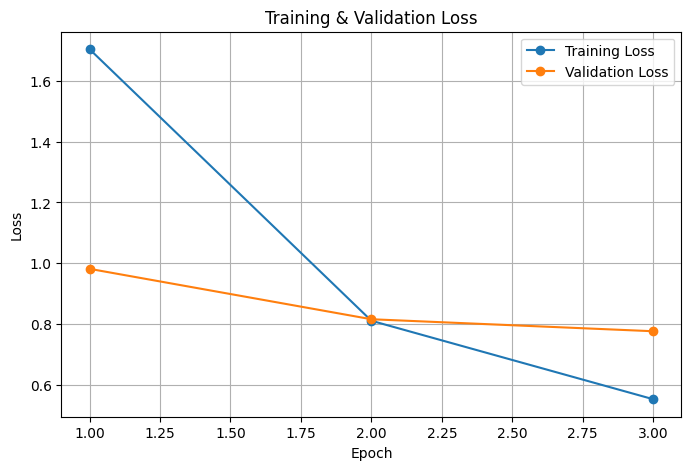

In [ ]:
train_logs = logs.dropna(subset=['loss'])
val_logs = logs.dropna(subset=['eval_loss'])

plt.figure(figsize=(8,5))
plt.plot(train_logs["epoch"], train_logs["loss"], label="Training Loss", marker='o')
plt.plot(val_logs["epoch"], val_logs["eval_loss"], label="Validation Loss", marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.grid()
plt.show()


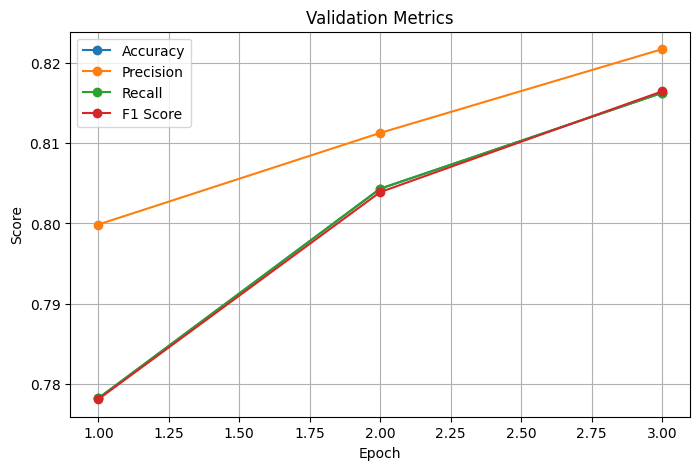

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(val_logs["epoch"], val_logs["eval_accuracy"], label="Accuracy", marker='o')
plt.plot(val_logs["epoch"], val_logs["eval_precision"], label="Precision", marker='o')
plt.plot(val_logs["epoch"], val_logs["eval_recall"], label="Recall", marker='o')
plt.plot(val_logs["epoch"], val_logs["eval_f1"], label="F1 Score", marker='o')
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("Validation Metrics")
plt.legend()
plt.grid()
plt.show()


### Training model using faster learning rate

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    learning_rate=1e-4,  # 👈 faster learning rate
    load_best_model_at_end=True,
    metric_for_best_model="eval_f1",
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[MetricTracker()]
)

trainer.train()


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.979300,1.110356,0.774459,0.772492,0.796533,0.774459
2,0.682300,0.894062,0.807692,0.805806,0.817701,0.807692
3,0.430300,0.881659,0.816654,0.815647,0.818824,0.816654



  Epoch    Train Loss    Eval Loss    Accuracy    Precision    Recall    F1
-------  ------------  -----------  ----------  -----------  --------  ----
      1        0.9793          nan         nan          nan       nan   nan

  Epoch    Train Loss    Eval Loss    Accuracy    Precision    Recall    F1
-------  ------------  -----------  ----------  -----------  --------  ----
      1        0.9793          nan         nan          nan       nan   nan
      2        0.6823          nan         nan          nan       nan   nan

  Epoch    Train Loss    Eval Loss    Accuracy    Precision    Recall    F1
-------  ------------  -----------  ----------  -----------  --------  ----
      1        0.9793          nan         nan          nan       nan   nan
      2        0.6823          nan         nan          nan       nan   nan
      3        0.4303          nan         nan          nan       nan   nan


TrainOutput(global_step=4017, training_loss=0.6972943116753796, metrics={'train_runtime': 1292.8242, 'train_samples_per_second': 24.855, 'train_steps_per_second': 3.107, 'total_flos': 2114414962672896.0, 'train_loss': 0.6972943116753796, 'epoch': 3.0})

**the model is overfitting as seen in the output**

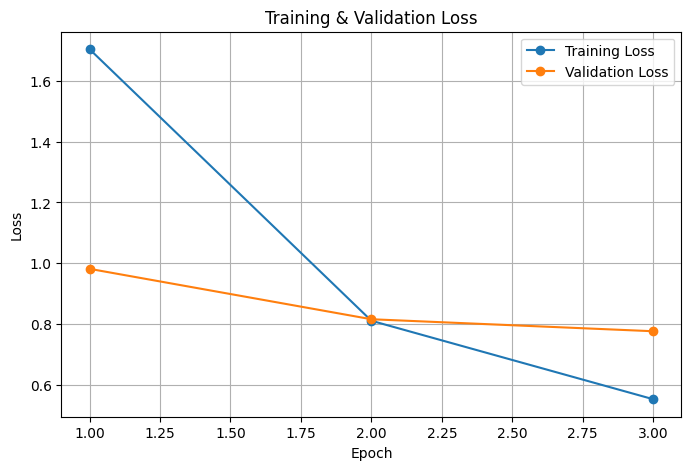

In [ ]:
train_logs = logs.dropna(subset=['loss'])
val_logs = logs.dropna(subset=['eval_loss'])

plt.figure(figsize=(8,5))
plt.plot(train_logs["epoch"], train_logs["loss"], label="Training Loss", marker='o')
plt.plot(val_logs["epoch"], val_logs["eval_loss"], label="Validation Loss", marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.grid()
plt.show()


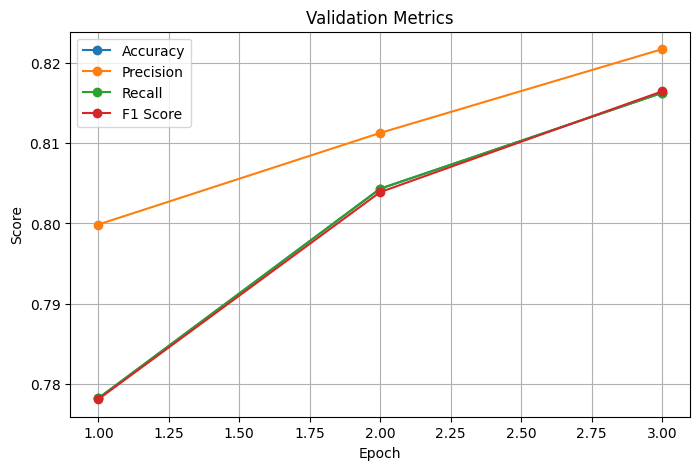

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(val_logs["epoch"], val_logs["eval_accuracy"], label="Accuracy", marker='o')
plt.plot(val_logs["epoch"], val_logs["eval_precision"], label="Precision", marker='o')
plt.plot(val_logs["epoch"], val_logs["eval_recall"], label="Recall", marker='o')
plt.plot(val_logs["epoch"], val_logs["eval_f1"], label="F1 Score", marker='o')
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("Validation Metrics")
plt.legend()
plt.grid()
plt.show()
